In [1]:
# import external modules
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import local modules.e
from utils import data_loader, pre_training_analysis_tools
from model.base_model import BaseModel



In [2]:
# data - both x and y 
data = data_loader.load_real_dataset()

# getting the x or y component of the data
data_x = data['train_x']
data_y = data['train_y']
#test_x = data['test_x']
#test_y = data['test_y']

# normalising the data
# code sourced from here: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
from sklearn import preprocessing

x = data_x.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_x = pd.DataFrame(x_scaled, columns=data_x.columns)

#x = test_x.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#test_x = pd.DataFrame(x_scaled, columns=test_x.columns)

# since the function below requires both the x and y in a dataframe, this goes through some code to achieve that 
x = data_x
y = data_y
#concat two dataframes for better visualization 
pd.set_option('display.max_rows', None)
matrix = pd.concat([x,y],axis=1)


matrix.dropna(how='any', inplace=True)
display(matrix.describe())

matrix['maven_reuse'] = np.where(matrix['maven_reuse'].between(0,44), 1, matrix['maven_reuse'])
matrix['maven_reuse'] = np.where(matrix['maven_reuse'].between(45,445), 2, matrix['maven_reuse'])
matrix['maven_reuse'] = np.where(matrix['maven_reuse'].between(446,100000), 3, matrix['maven_reuse'])

display(matrix)


#breaking it up into a and y again
# storing the output data into a var
data_x = matrix
data_y = matrix.pop('maven_reuse')




,synchronizedMethodsQty_sum,synchronizedMethodsQty_average,synchronizedMethodsQty_stdev,synchronizedMethodsQty_median,synchronizedMethodsQty_min,synchronizedMethodsQty_max,parenthesizedExpsQty_sum,parenthesizedExpsQty_average,parenthesizedExpsQty_stdev,parenthesizedExpsQty_median,...,innerClassesQty_min,innerClassesQty_max,comparisonsQty_sum,comparisonsQty_average,comparisonsQty_stdev,comparisonsQty_median,comparisonsQty_min,comparisonsQty_max,constant,maven_reuse
count,113.000000,113.000000,113.000000,113.0,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.0,113.000000,113.000000,113.000000,113.000000,113.000000,113.0,113.000000,113.0,113.000000
mean,0.080093,0.038648,0.061382,0.0,0.0,0.105807,0.037267,0.081069,0.118488,0.024336,...,0.0,0.105762,0.018734,0.060751,0.111624,0.024466,0.0,0.143292,0.0,1.805310
std,0.180395,0.102146,0.108741,0.0,0.0,0.165123,0.081495,0.148917,0.176789,0.124842,...,0.0,0.170219,0.039174,0.107319,0.143623,0.111090,0.0,0.179890,0.0,0.705317
min,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000023,0.001507,0.000000,0.000000,0.0,0.001669,0.0,1.000000
25%,0.000801,0.001362,0.006545,0.0,0.0,0.008772,0.001579,0.014435,0.027840,0.000000,...,0.0,0.016304,0.001019,0.018126,0.036786,0.000000,0.0,0.031720,0.0,1.000000
50%,0.009615,0.013365,0.031899,0.0,0.0,0.043860,0.007057,0.034652,0.057717,0.000000,...,0.0,0.038043,0.003487,0.031943,0.070132,0.000000,0.0,0.068447,0.0,2.000000
75%,0.058494,0.036754,0.076826,0.0,0.0,0.131579,0.034595,0.073529,0.128579,0.000000,...,0.0,0.103261,0.018882,0.068027,0.135985,0.000000,0.0,0.160267,0.0,2.000000
max,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.431970,1.000000,1.000000,1.000000,...,0.0,0.831522,0.180181,1.000000,1.000000,1.000000,0.0,1.000000,0.0,3.000000


,synchronizedMethodsQty_sum,synchronizedMethodsQty_average,synchronizedMethodsQty_stdev,synchronizedMethodsQty_median,synchronizedMethodsQty_min,synchronizedMethodsQty_max,parenthesizedExpsQty_sum,parenthesizedExpsQty_average,parenthesizedExpsQty_stdev,parenthesizedExpsQty_median,...,innerClassesQty_min,innerClassesQty_max,comparisonsQty_sum,comparisonsQty_average,comparisonsQty_stdev,comparisonsQty_median,comparisonsQty_min,comparisonsQty_max,constant,maven_reuse
0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000099,0.073529,0.041181,0.50,...,0.0,0.000000,0.000045,0.055446,0.000000,0.235294,0.0,0.003339,0.0,1.0
1,0.098558,0.050956,0.283577,0.0,0.0,0.763158,0.042442,0.085223,0.152778,0.00,...,0.0,0.065217,0.021395,0.070615,0.244849,0.000000,0.0,0.539232,0.0,1.0
2,0.017628,0.054101,0.091959,0.0,0.0,0.087719,0.009574,0.114118,0.242659,0.00,...,0.0,0.021739,0.003951,0.077402,0.182501,0.000000,0.0,0.178631,0.0,1.0
3,0.108974,0.099065,0.156196,0.0,0.0,0.184211,0.045995,0.162392,0.640273,0.00,...,0.0,0.038043,0.009588,0.055643,0.219961,0.000000,0.0,0.373957,0.0,1.0
4,0.058494,0.037029,0.230749,0.0,0.0,0.578947,0.020382,0.050112,0.078668,0.00,...,0.0,0.010870,0.013448,0.054348,0.115345,0.000000,0.0,0.180301,0.0,1.0
5,0.000801,0.000159,0.001956,0.0,0.0,0.008772,0.034595,0.026721,0.035554,0.00,...,0.0,0.076087,0.015984,0.020293,0.039790,0.000000,0.0,0.056761,0.0,1.0
6,0.007212,0.005372,0.017297,0.0,0.0,0.026316,0.063860,0.184752,0.302871,0.00,...,0.0,0.086957,0.024474,0.116382,0.350526,0.000000,0.0,0.429048,0.0,1.0
7,0.007212,0.003221,0.015766,0.0,0.0,0.035088,0.004984,0.008645,0.033078,0.00,...,0.0,0.831522,0.003475,0.009908,0.035176,0.000000,0.0,0.056761,0.0,1.0
8,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000543,0.028887,0.027840,0.00,...,0.0,0.027174,0.000170,0.014851,0.020439,0.000000,0.0,0.008347,0.0,1.0
10,0.058494,0.056099,0.163725,0.0,0.0,0.271930,0.012733,0.047426,0.072679,0.00,...,0.0,0.016304,0.004279,0.026198,0.057055,0.000000,0.0,0.065109,0.0,1.0


In [3]:
# remove metrics with zero variance
data_x = pre_training_analysis_tools.variance_threshold(data_x)

Original feature shape: (113, 265)
Transformed feature shape: (113, 207)


[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [207] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [30] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
        PC                         feature   loading  type
0      PC1           privateMethodsQty_sum  0.199945  best
1      PC2       maxNestedBlocksQty_median  0.171254  best
2      PC3                         lcc_min  0.412124  best
3      PC4        abstractMethodsQty_stdev  0.228420  best
4      PC5        parenthesizedExpsQty_max -0.282020  best
5      PC6                 modifiers_stdev -0.236244  best
6      PC7                   modifiers_min  0.407590  best
7      PC8                      dit_median  0.349625 

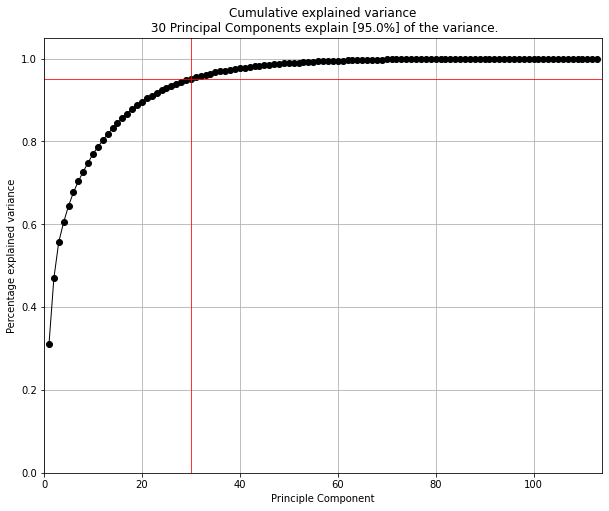

<Figure size 432x288 with 0 Axes>

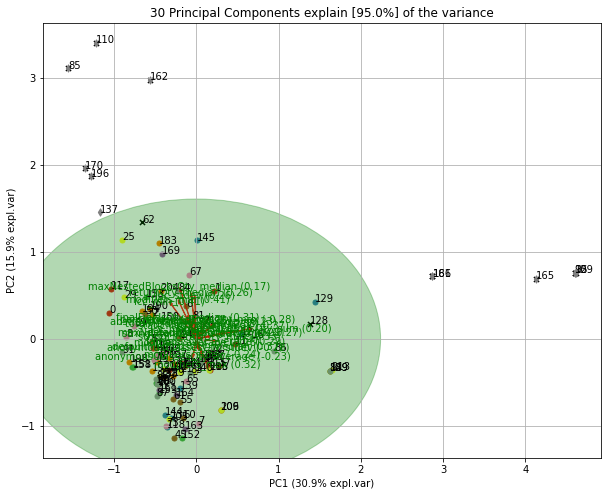

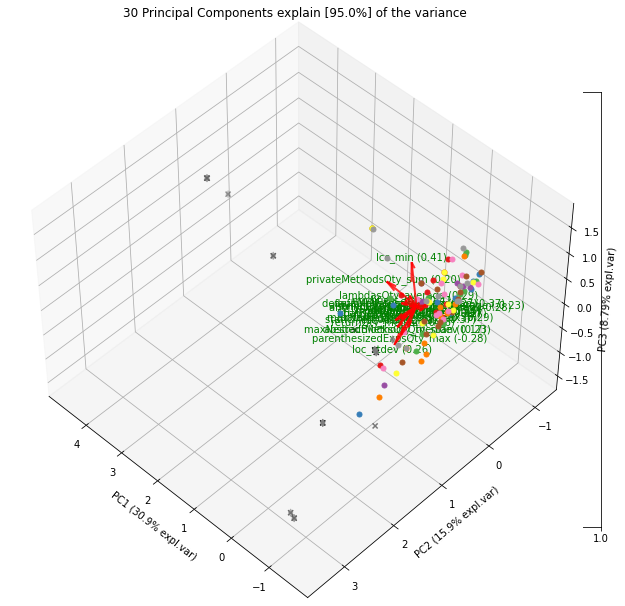

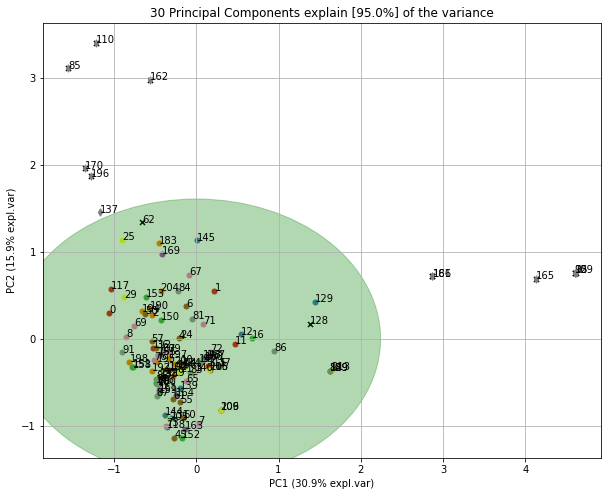

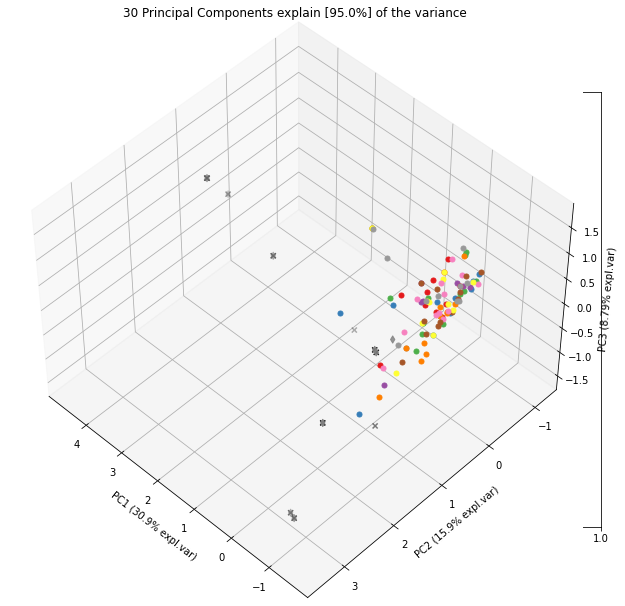

In [4]:
# from here: https://github.com/erdogant/pca
# finds the pca (takes in data_x from previous step) -> need to fix since to many points to see the name
pre_training_analysis_tools.pca(data_x)

In [ ]:
# using this pca on all models (no hyper parameter tuning form)
pre_training_analysis_tools.all_model_score(data_x,data_y,test_x,test_y)